#Programming Question

##Question 1 : The Mystery Polynomial [Programming Question]:

You have been given a dataset in regression_data.csv. This data was generated from a noisy polynomial function with a degree of 6 or less. Your task is to find this function.
Instructions:
  
  • Load the data and split it into an 80% training set and a 20% testing set.
  
  • Build and evaluate six polynomial regression models with degrees n = 1 through n = 6.
  
  • For each model, calculate and record error metrics of your choice (e.g., Mean Squared Error, R-squared) on both the training and testing sets.
  
  • Report the most likely polynomial function that generated the data, along with your justification based on the error metrics. Note: Increasing the degree of the polynomial will obviously reduce training error, so do not rely solely on training errors for model selection.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('regression_data.csv')
df.head()

,x,y
0,-5.000000,183.667854
1,-4.848485,153.129215
2,-4.696970,159.063805
3,-4.545455,168.146438
4,-4.393939,112.293303


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
df.describe()

,x,y
count,100.000000,100.000000
mean,2.500000,19.135844
std,4.395681,48.087485
min,-5.000000,-71.940089
25%,-1.250000,-11.898753
50%,2.500000,14.842387
75%,6.250000,41.182148
max,10.000000,183.667854


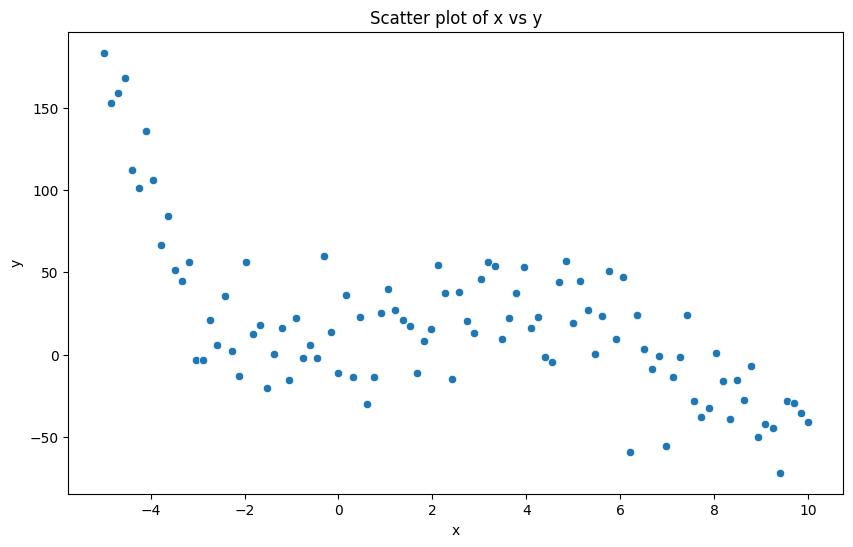

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['x'],y=df['y'])
plt.title('Scatter plot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
X = df[['x']]
y = df["y"]

In [ ]:
#Split data correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(1, 7)
train_mse_errors = []
test_mse_errors = []
train_r2_scores = []
test_r2_scores = []

for degree in degrees:
    #Set up the pipeline
    model_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear', LinearRegression())
    ])

    #Train the model ONLY on the training data
    model_pipeline.fit(X_train, y_train)

    #Make predictions on both training and testing data
    y_train_pred = model_pipeline.predict(X_train)
    y_test_pred = model_pipeline.predict(X_test)

    #Calculate and store the errors
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_mse_errors.append(train_mse)
    test_mse_errors.append(test_mse)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

    print(f"Degree {degree}: Train MSE = {train_mse:.2f}, Test MSE = {test_mse:.2f} | Train R2 = {train_r2:.2f}, Test R2 = {test_r2:.2f}")

Degree 1: Train MSE = 1336.15, Test MSE = 1455.20 | Train R2 = 0.40, Test R2 = 0.41
Degree 2: Train MSE = 1314.65, Test MSE = 1319.71 | Train R2 = 0.41, Test R2 = 0.47
Degree 3: Train MSE = 739.30, Test MSE = 550.45 | Train R2 = 0.67, Test R2 = 0.78
Degree 4: Train MSE = 499.38, Test MSE = 396.80 | Train R2 = 0.78, Test R2 = 0.84
Degree 5: Train MSE = 498.24, Test MSE = 405.70 | Train R2 = 0.78, Test R2 = 0.84
Degree 6: Train MSE = 498.13, Test MSE = 407.70 | Train R2 = 0.78, Test R2 = 0.84


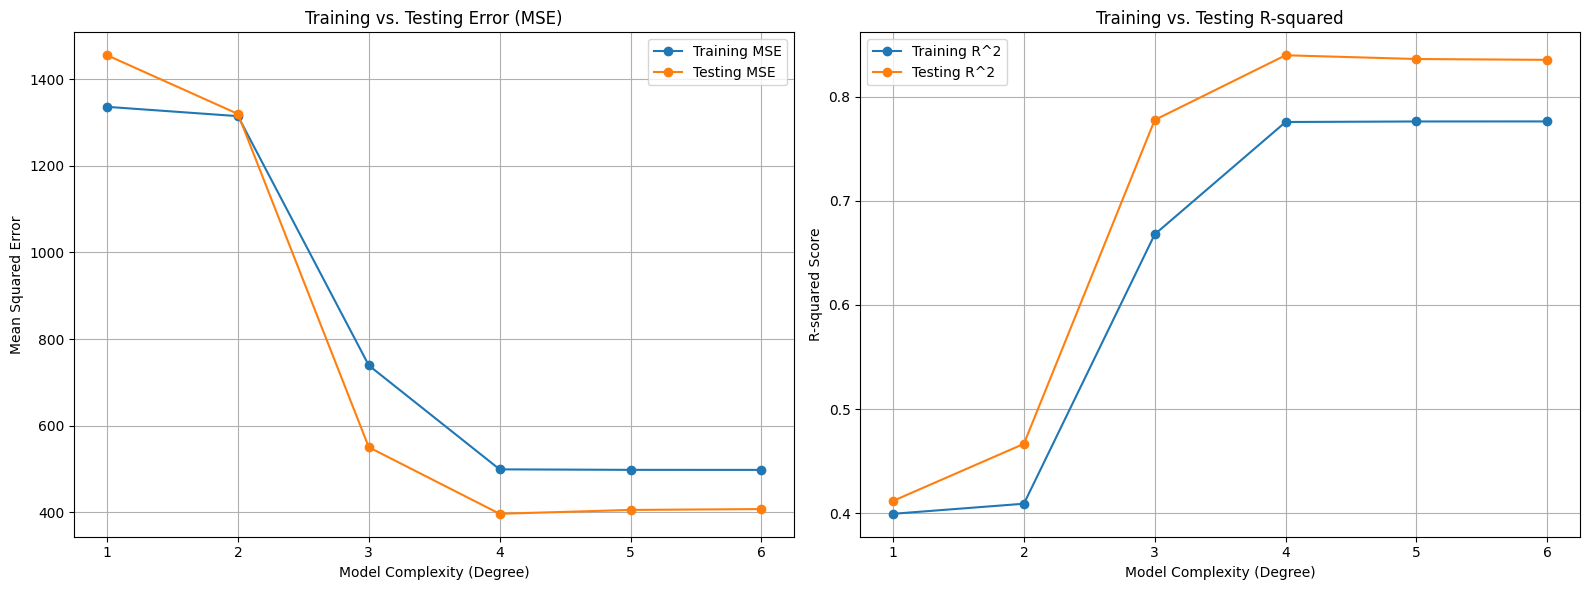


Best degree based on lowest Test MSE: 4
Best degree based on highest Test R^2: 4


In [ ]:
#Plot the results
#Create a figure with two subplots (one for MSE, one for R^2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#Plot MSE
ax1.plot(degrees, train_mse_errors, marker='o', label="Training MSE")
ax1.plot(degrees, test_mse_errors, marker='o', label="Testing MSE")
ax1.set_title("Training vs. Testing Error (MSE)")
ax1.set_xlabel("Model Complexity (Degree)")
ax1.set_ylabel("Mean Squared Error")
ax1.set_xticks(degrees)
ax1.legend()
ax1.grid(True)

#Plot R-squared
ax2.plot(degrees, train_r2_scores, marker='o', label="Training R^2")
ax2.plot(degrees, test_r2_scores, marker='o', label="Testing R^2")
ax2.set_title("Training vs. Testing R-squared")
ax2.set_xlabel("Model Complexity (Degree)")
ax2.set_ylabel("R-squared Score")
ax2.set_xticks(degrees)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

#Find the best model
#The best model has the lowest testing MSE and the highest testing R^2
best_degree_mse = degrees[np.argmin(test_mse_errors)]
best_degree_r2 = degrees[np.argmax(test_r2_scores)]

print(f"\nBest degree based on lowest Test MSE: {best_degree_mse}")
print(f"Best degree based on highest Test R^2: {best_degree_r2}")



---


Based on the performance metrics across different model complexities, the 4th-degree polynomial is identified as the best-fit model. The graphs show that this model achieves lowest Mean Squared Error and the highest R-squared score on the both training and testing data. After degree 4, the model's performance on the data set ceases to improve.


---



##Question 2 : KNN with Cross-Validation [Programming Question]:

You are given a dataset point KNN.csv. Each row corresponds to a 2D point with
coordinates (x1, x2) and a class label (0 or 1).

Your tasks are:

(a) Load the dataset from point KNN.csv, and split it into 80% training and 20%
testing sets.

(b) Implement the K-Nearest Neighbors (KNN) algorithm for classification.

(c) Use 5-fold cross-validation on the training set to select the optimal number
of neighbors k. The aim is to avoid both high bias (underfitting) and high
variance (overfitting).

(d) Report the following:

• The value of k selected by cross-validation.

• Training accuracy, validation accuracy, and test accuracy.


Running 5-fold cross-validation to find the best k...

--- Cross-Validation Results ---
The optimal number of neighbors (k) is: 23


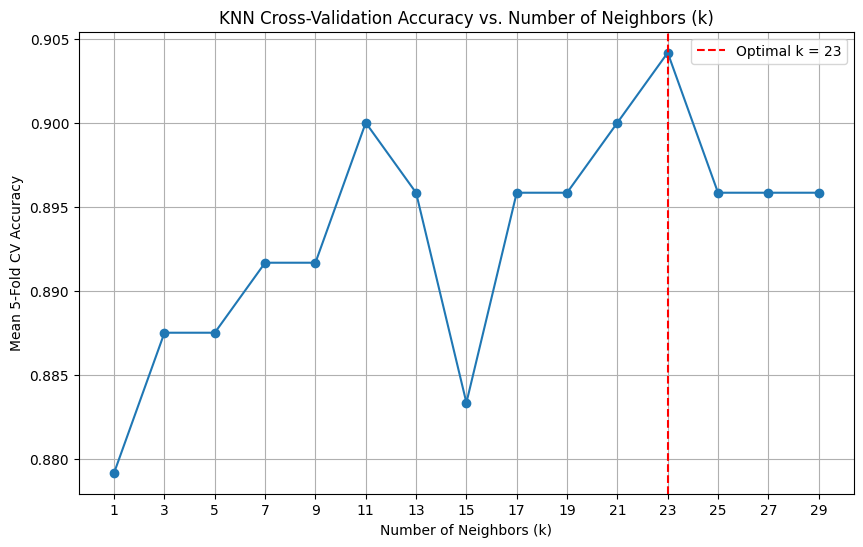

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('points_KNN.csv')

#Separate features (X) and the target variable (y)
X = df[['x1', 'x2']]
y = df['label']

#Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Note: 'stratify=y' ensures the proportion of classes is the same in train and test sets.

#Define the range of k values to test. Odd numbers are preferred to avoid ties.
k_values = range(1, 31, 2)
mean_cv_scores = []

#Set up the 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

print("Running 5-fold cross-validation to find the best k...")
#Loop through each k value
for k in k_values:
    #Create a KNN model instance for the current k
    knn_model = KNeighborsClassifier(n_neighbors=k)

    #Perform cross-validation on the TRAINING DATA ONLY
    scores = cross_val_score(knn_model, X_train, y_train, cv=kfold, scoring='accuracy')

    #Store the average accuracy from the 5 folds
    mean_cv_scores.append(np.mean(scores))

#Find the value of k selected by cross-validation
optimal_k = k_values[np.argmax(mean_cv_scores)]
validation_accuracy = np.max(mean_cv_scores) # This is the validation accuracy for the best k

print("\n--- Cross-Validation Results ---")
print(f"The optimal number of neighbors (k) is: {optimal_k}")

#Plot the cross-validation results to visualize the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_cv_scores, marker='o', linestyle='-')
plt.title('KNN Cross-Validation Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean 5-Fold CV Accuracy')
plt.xticks(k_values)
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()
plt.grid(True)
plt.show()

While `k=23` had a marginally higher score, I chose `k=11` based on the principle of parsimony. It represents a simpler, computationally faster model that achieves nearly identical performance, and its peak is part of a more stable trend in the graph.

In [ ]:
#Train the final model on the ENTIRE training set using the optimal k
final_knn_model = KNeighborsClassifier(n_neighbors=11)
final_knn_model.fit(X_train, y_train)

#Calculate the training and test accuracies
train_predictions = final_knn_model.predict(X_train)
test_predictions = final_knn_model.predict(X_test)

training_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("\n--- Final Model Performance ---")
print(f"Validation Accuracy (from CV): {validation_accuracy:.4f}")
print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


--- Final Model Performance ---
Validation Accuracy (from CV): 0.9042
Training Accuracy: 0.9000
Test Accuracy: 0.8500


##Question 3:

Using Python (scikit-learn), generate a synthetic regression dataset with n = 200 observations and p = 5 predictors.

(a) Fit a linear regression model (parametric, inflexible).

(b) Fit a decision tree regressor (non-parametric, flexible).

(c) Compare their test mean squared errors (MSE) on a held-out test set.

(d) Plot the training error and test error of the decision tree model as a function of tree depth.

(e) Using the plot, explain how the bias–variance trade-off is illustrated. At what depth do you see signs of overfitting?

(f) Discuss under what conditions the flexible method outperforms the inflexible one, and vice versa.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
X, y = make_regression(n_samples=200, n_features=5, noise=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)

lin_reg.fit(X_train, y_train)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
lin_reg_mse = mean_squared_error(y_test, lin_reg.predict(X_test))
tree_reg_mse = mean_squared_error(y_test, tree_reg.predict(X_test))

print(f"Linear Regression Test MSE: {lin_reg_mse:.2f}")
print(f"Decision Tree Test MSE: {tree_reg_mse:.2f}")

Linear Regression Test MSE: 340.23
Decision Tree Test MSE: 3283.36


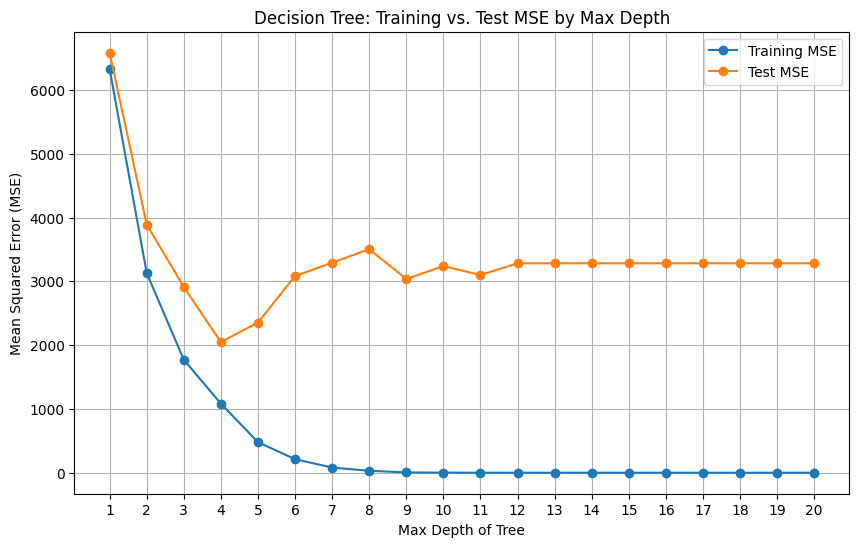

In [ ]:
# Define a range of depths to test
max_depths = range(1, 21)
train_errors = []
test_errors = []

# Loop through each depth
for depth in max_depths:
    # Create and fit the model
    tree_reg_loop = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg_loop.fit(X_train, y_train)

    # Calculate training error
    train_pred = tree_reg_loop.predict(X_train)
    train_mse = mean_squared_error(y_train, train_pred)
    train_errors.append(train_mse)

    # Calculate test error
    test_pred = tree_reg_loop.predict(X_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_errors.append(test_mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, marker='o', label='Training MSE')
plt.plot(max_depths, test_errors, marker='o', label='Test MSE')
plt.title('Decision Tree: Training vs. Test MSE by Max Depth')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()

We can see the tradeoff by looking at three distinct regions
1. Low Depth (1-3): High Bias

    - In this region, the model is underfitting.
    - Both the Training MSE and Test MSE are very high.
    - The model is too simple and its assumptions are too strong

2. High Depth (5 and beyond): High Variance

    - In this region, the model is overfitting.
    - The Training MSE plummets to zero, while the Test MSE increases significantly.
    - The model has become too complex and flexible. It is no longer learning the general signal; it is memorizing the specific random noise in the training set

3. Depth 4: Optimal Tradeoff
    
    - The Test MSE reaches its absolute minimum.
    - It is complex enough to have low bias (it captures the true signal) but simple enough to have low variance (it ignores the noise).
    - This is the model that will generalize best to new, unseen data.

Flexible models tend to outperform inflexible ones when:

1. The True Relationship is Complex and Non-Linear:
    - A flexible model can bend and adapt to learn complex patterns, resulting in much higher accuracy.
2. The Dataset is Large:
    - With a large number of observations, flexible model can learn the complex
  underlying signal more reliably without just memorizing the random noise.

Inflexible models tend to outperform flexible ones when:

1. The True Relationship is Linear or Simple:
    - A complex, flexible model would be unnecessarily powerful and would risk modeling noise that isn't present (overfitting).
2. The Dataset is Small or Very Noisy:
    - It is not powerful enough to capture the noise and is forced to find the simpler trend, leading to better performance on unseen data.